<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II - R4052 - 2023

# Tarea Semanal 1
#### Autor: Victor Rodolfo Gerez (146.766-9)

***
Dado el siguiente circuito:
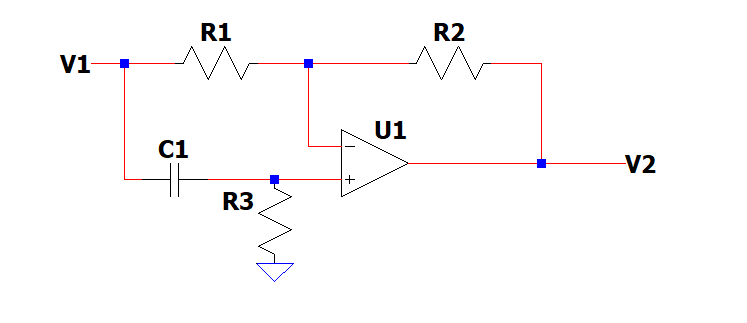
1. Obtener la función transferencia V2V1 ( módulo , fase y diagrama de polos y ceros).
2. ¿Qué tipo de filtro es?
3. Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?
4. Simule la función transferencia normalizada (Python, Matlab, etc.).
5. Simule el circuito y obtenga la respuesta en frecuencia pedida en **1)**, para los valores:  $\frac {R_2}{R_1}=1; R_3=1kΩ \,\,y \,\,C=1µF$
6. ¿Qué utilidad podría tener este tipo de circuitos?

Bonus:

    +1 💎 Obtener una RED normalizada que responda a la función hallada en 3)
    +1 🎓 Verifique los resultados de 1 y 2 mediante el módulo de simulación simbólica SymPy.
    +1 🤯 Presentación en jupyter notebook


***

## **1)**
### $I_{C} = I_{R3}$  
### $\frac{V_1-V_A}{\frac 1{SC}} = \frac {V_A}{R_3}$  
### $SCV_1 = V_A(\frac 1{R_3}+SC)$      
### $\frac {SCR_3}{SCR_3+1}V_1 = V_A$      

---------------

### $I_{R1} = I_{R2}$  
### $\frac{V_1-V_A}{R_1} = \frac {V_A-V_2}{R_2}$  
### $\frac {V_1}{R_1}= V_A(\frac 1{R_1}+\frac 1{R_2})-\frac {V_2}{R_2}$      
### Como $ R_2=R_1=R \Rightarrow \frac {V_1}R = 2\frac {V_A}R-\frac {V_2}R$      
### $V_1 = 2 \frac {SCR_3}{SCR_3+1}V_1-V_2$  
### $V_2 = V_1 (\frac {2 SCR_3}{SCR_3+1}-1)$  
### $T(S)= \frac {V_2}{V_1} = \frac {2 CR_3S-(SCR_3+1)}{SCR_3+1}=\frac {CR_3S-1}{CR_3S+1}$   
### $\boxed{T(S)=\frac {S-\frac 1{R_3C}}{S+\frac 1{R_3C}}}$   

---------------

### Cero real en $\boxed{Z:(\frac 1{R_3C})}$
### Polo real en $\boxed{P:(-\frac 1{R_3C})}$

---------------

### Siendo $\,\omega_0=\frac 1{R_3C} \Rightarrow T(S)=\frac {S-\omega_0}{S+\omega_0}$ 
### Reemplazando valores de componentes $\,\omega_0=1000 \frac {rad}{seg}$  

---------------
### ${T(S)}=\frac {S-\omega_0}{S+\omega_0}$  
### ${T(S)}_{S=j\omega}=\frac {j\omega-\omega_0}{j\omega+\omega_0}$  
### $\left|{T(j\omega)}\right|=\frac {\left|{N(j\omega)}\right|}{\left|{D(j\omega)}\right|}=\frac {\sqrt{\omega_0^2+\omega^2}}{\sqrt{\omega_0^2+\omega^2}}$  
### $\boxed{\left|{T(j\omega)}\right|=1=0\,dB}$
---------------
### $\phi [T(j\omega)]=\phi[N(j\omega)]-\phi[D(j\omega)]=\arctan(\frac {\Im[N(j\omega)]}{\Re[N(j\omega)]})-\arctan(\frac {\Im[D(j\omega)]}{\Re[D(j\omega)]})=\arctan(\frac \omega{-\omega_0})-\arctan(\frac \omega{\omega_0})$  
### Como $\, \arctan(\frac \omega{-\omega_0})=-\arctan(\frac \omega{\omega_0})\,$ por ser función impar  
### $\boxed{\phi [T(j\omega)]=-2\arctan(\frac \omega{\omega_0})}$  
### Si $\, \omega\rightarrow 0 \Rightarrow \phi [T(S)(j\omega)] \rightarrow \pi$  
### Si $\, \omega\rightarrow \omega_0 \Rightarrow \phi [T(S)(j\omega)] \rightarrow \frac \pi 2$  
### Si $\, \omega\rightarrow \infty \Rightarrow \phi [T(S)(j\omega)] \rightarrow 0$ 

***
## **2)**
### Es un filtro "pasa-todo" o "rotador de fase" dado que su módulo es el mismo para todas las frecuencias (en este caso no da ganancia ni atenúa) y su efecto afecta solo a la fase de cada frecuencia.

---------------
## **3)**
### Normalizo con norma de frecuencia$ \rightarrow \boxed{\Omega= \frac 1{R_3C}=1000 \frac 1{seg}} \Rightarrow  \omega_0=1 \Rightarrow \boxed{T_N(S)=\frac {S-1}{S+1}}$   
### Calculo nuevo componente $\,C_N=C\,\Omega=1mF$ 
#### Aclaración: es posible calcular otros valores de componentes más convenientes utilizando también la norma de impedancia. Por ejemplo:  
### $\mathbb Z=0,1\,\Omega \Rightarrow {R_3}_N=10\,k \land C_N=100 \mu$  



------------
## **4)**

Cargo librerías:

In [1]:
# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import matplotlib as mpl

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

Configuro gráficos:

In [2]:
plt.figure(1)
plt.close(1)

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

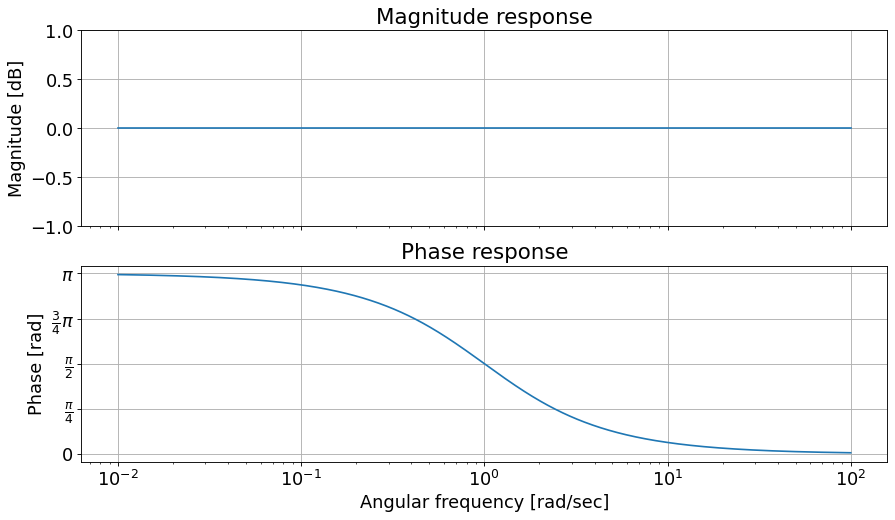

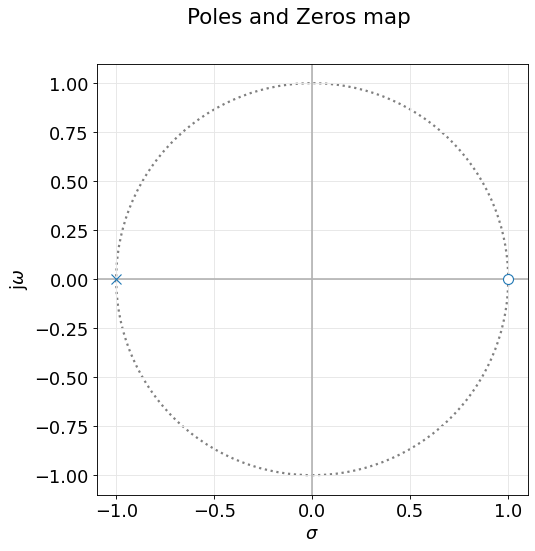

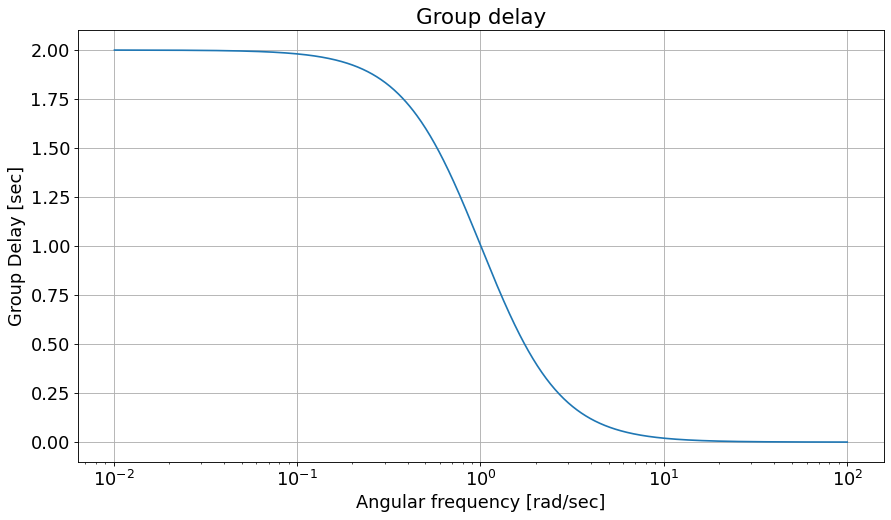

In [3]:
#import signal as sig
from splane import analyze_sys

w0 = 1

num = np.array([1,-w0]) 
den = np.array([1,w0])

TS = sig.TransferFunction(num,den)

_, axes_hdl = bodePlot(TS)

plt.sca(axes_hdl[0])
plt.ylim([-1,1])

plt.gca

pzmap(TS)
GroupDelay(TS)

plt.show()

------------
## **5)**

<img src="Simulaciones/Simu_1.png"/>

<img src="Simulaciones/Simu_2.png"/>

------------
## **6)**

### Este tipo de circuitos puede servir para otorgar una demora (delay) a una señal (por ejemplo para ponerla en fase con otra, es decir sincronizarlas) por ejemplo para un sistema de comunicación teniendo en cuenta que se requiere un retardo de grupo constante para que no haya distorsión, en otras palabras misma demora en segundos a cada componente de frecuencia.
### Cabe aclarar que esto funciona solo sobre una banda de frecuencias de trabajo, fuera de ella los delays empiezan a variar como se puede ver en la simulación: a partir de $\,\omega\approx 62,8 \frac {rad}{seg}\,$ se puede apreciar una variación visualmente considerable donde el retardo de grupo deja de ser constante.